In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as nx
import seaborn as sns
import missingno

Our initial step is to collect and read in all the relevant files into our system. Once we have the complete set of data, our next objective is to merge these individual files into a single comprehensive dataset. Before combining the files, we will carry out thorough data cleaning and processing on each of them to ensure accuracy and consistency in our final output.

# Cab_Data File

In [57]:
df_cab = pd.read_csv("Cab_Data.csv")
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [58]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [59]:
# See if the data has any missing values
missing_cab = df_cab.isnull().sum()
missing_cab

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [60]:
# Convert the 'Date of Travel' column to a datetime object
df_cab['Date of Travel'] = pd.to_datetime(df_cab['Date of Travel'], unit='d', origin='1899-12-30')
print(df_cab.head())

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


Convert to date and time 

In [61]:
# Check unqiue values for column
df_cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [62]:
df_cab['Price Charged'].unique()


array([370.95, 358.52, 125.2 , ...,  31.49, 742.24, 620.62])

<AxesSubplot: xlabel='Price Charged'>

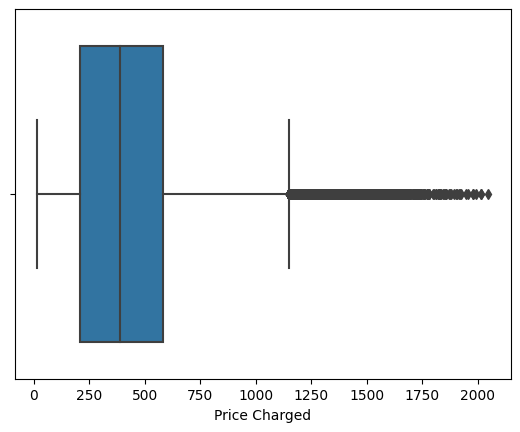

In [63]:
# Check for outliers 
sns.boxplot(x=df_cab['Price Charged'])

Seems to be outliers outisde of 1200 but there is no way to cross refernce this data so we will keep this in

In [64]:
# Check duplicates
cab_duplicates = df_cab[df_cab.duplicated()]

if cab_duplicates.empty:
    print("There are no duplicates in the file.")
else:
    print("There are duplicates in the file.")

There are no duplicates in the file.


In [65]:
# Check all changes have been made
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


# City File

In [66]:
df_city = pd.read_csv("City.csv")
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [67]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [68]:
# See if the data has any missing values
missing_city = df_city.isnull().sum()
missing_city

City          0
Population    0
Users         0
dtype: int64

In [69]:
# Check unqiue values for column
df_city['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [70]:
# Check duplicates
city_duplicates = df_city[df_city.duplicated()]

if city_duplicates.empty:
    print("There are no duplicates in the file.")
else:
    print("There are duplicates in the file.")

There are no duplicates in the file.


# Customer_ID File

In [71]:
df_customer = pd.read_csv("Customer_ID.csv")
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [72]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [73]:
missing_customer = df_customer.isnull().sum()
missing_customer 

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [74]:
# Check duplicates
customer_duplicates = df_customer[df_customer.duplicated()]

if customer_duplicates.empty:
    print("There are no duplicates in the file.")
else:
    print("There are duplicates in the file.")

There are no duplicates in the file.


# Transaction_ID File

In [75]:
df_transaction = pd.read_csv('Transaction_ID.csv')
df_transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [76]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [77]:
missing_transaction = df_transaction.isna().sum()
missing_transaction 

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [78]:
# Check duplicates
transaction_duplicates = df_transaction[df_transaction.duplicated()]

if transaction_duplicates.empty:
    print("There are no duplicates in the file.")
else:
    print("There are duplicates in the file.")

There are no duplicates in the file.


Having completed the cleaning and processing of all the data, we are now ready to merge files that share a common key, thereby consolidating the information into a more comprehensive and meaningful dataset.

In [79]:
# join the 'df_cab' + 'df_city' on the 'City' column
joined_df = pd.merge(df_cab, df_city, on='City')
joined_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001"
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"


In [80]:
joined_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Population        0
Users             0
dtype: int64

In [81]:
# join the 'df_customer' + 'df_transaction' on the 'Customer ID' column
joined_df2 = pd.merge(df_customer, df_transaction, on='Customer ID')
joined_df2

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [82]:
joined_df2.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
dtype: int64

In [83]:
# join the 2 datasets 'joined_df' + 'joined_df2' on the 'Transaction ID' column
cab_df = pd.merge(joined_df, joined_df2, on='Transaction ID')
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",52392,Male,24,15651,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",53286,Male,32,6528,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",52265,Male,56,7966,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",52175,Male,32,6423,Card


In [84]:
cab_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
dtype: int64

In [132]:
# Created new column called 'Year' for analysis
cab_df['Year'] = cab_df['Date of Travel'].dt.year
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Male,28,10813,Card,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Male,27,9237,Card,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",28712,Male,53,11242,Cash,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",28020,Male,23,23327,Cash,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",27182,Male,33,8536,Card,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",52392,Male,24,15651,Cash,2018
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",53286,Male,32,6528,Cash,2018
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",52265,Male,56,7966,Cash,2018
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",52175,Male,32,6423,Card,2018


We have successfully created the master dataset by merging all four files using a common column, enabling us to consolidate all relevant data into one comprehensive file.

# Analysis

In [133]:
# Datasets for each cab company
pink_df = cab_df[cab_df['Company'] == 'Pink Cab']

yellow_df = cab_df[cab_df['Company'] == 'Yellow Cab']

In [149]:
# calculate total profit for each company 
pink_profit_total = pink_df['Price Charged'] - pink_df['Cost of Trip']
yellow_profit_total = yellow_df['Price Charged'] - yellow_df['Cost of Trip']
print("Pink Cab total profit:", pink_profit_total.sum())
print("Yellow Cab total profit:", yellow_profit_total.sum())

Pink Cab total profit: 5307328.3209999995
Yellow Cab total profit: 44020373.1708


# Total Profit Per Cab Company

In [158]:
# Total Profit 
data = {'Cab Company': ['Pink Cab', 'Yellow Cab'],
        'Total Profit': [5307328.3209999995, 44020373.1708]}
df = pd.DataFrame(data)

# create a styler object
styler = df.style

# set table properties
styler = styler.set_table_styles([{'selector': 'th',
                                   'props': [('border', '1px solid black'),
                                             ('text-align', 'center')]},
                                  {'selector': 'td',
                                   'props': [('border', '1px solid black')]}])

# format the 'Total Profit' column
styler = styler.format({'Total Profit': '{:,.2f}'})
# render the styled table
styler

,Cab Company,Total Profit
0,Pink Cab,"5,307,328.32"
1,Yellow Cab,"44,020,373.17"


In [151]:
# calculate total profit for each company by year
pink_profit_by_year = pink_df.groupby('Year')[['Price Charged', 'Cost of Trip']].sum()
pink_total_profit = pink_profit_by_year['Price Charged'] - pink_profit_by_year['Cost of Trip']

yellow_profit_by_year = yellow_df.groupby('Year')[['Price Charged', 'Cost of Trip']].sum()
yellow_total_profit = yellow_profit_by_year['Price Charged'] - yellow_profit_by_year['Cost of Trip']
yellow_total_profit_formatted = yellow_total_profit.apply(lambda x: '{:.2f}'.format(x)) # Format for more readibility


print("Pink Cab total profit:", pink_total_profit)
print("Yellow Cab total profit:", yellow_total_profit_formatted)

Pink Cab total profit: Year
2016    1713511.224
2017    2033654.908
2018    1560162.189
dtype: float64
Yellow Cab total profit: Year
2016    13926995.43
2017    16575977.97
2018    13517399.77
dtype: object
